In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")  # blanco

plt.rcParams["figure.figsize"] = (10,8)

#EDA
import sidetable as stb
from itertools import combinations
import researchpy as rp

# Imputar nulos
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.impute import KNNImputer


from scipy import stats 
from scipy.stats import skew   #asimetría
from scipy.stats import kurtosistest    #curtosis
from scipy.stats import kstest   #kolmogorov

from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Para la codificación de las variables categóricas
from sklearn.preprocessing import LabelEncoder # para realizar el Label Encoding 
from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = None 

/tmp/ipykernel_6459/1941950289.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")  # blanco


In [21]:
df = pd.read_csv('data/train.csv', index_col = 0)
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [22]:
df.shape

(3390, 16)

In [23]:
df.dtypes

age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [3]:
df['BPMeds'].unique()

array([ 0., nan,  1.])

In [6]:
lista_categoricas = ['education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

for col in lista_categoricas:
    df[col] = df[col].astype('category')

In [7]:
df.dtypes

age                   int64
education          category
sex                  object
is_smoking           object
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD         category
dtype: object

In [24]:
df.duplicated().sum()

0

In [25]:
df.stb.missing()

,missing,total,percent
glucose,304,3390,8.967552
education,87,3390,2.566372
BPMeds,44,3390,1.297935
totChol,38,3390,1.120944
cigsPerDay,22,3390,0.648968
BMI,14,3390,0.412979
heartRate,1,3390,0.029499
age,0,3390,0.000000
sex,0,3390,0.000000
is_smoking,0,3390,0.000000


In [10]:
df_cat = df.select_dtypes(include = ['O', 'category'])
df_num = df.select_dtypes(include = np.number)

In [27]:
for col in df_cat:
    df.stb.freq([col])

,education,count,percent,cumulative_count,cumulative_percent
0,1.0,1391,42.113230,1391,42.113230
1,2.0,990,29.972752,2381,72.085982
2,3.0,549,16.621253,2930,88.707236
3,4.0,373,11.292764,3303,100.000000


,sex,count,percent,cumulative_count,cumulative_percent
0,F,1923,56.725664,1923,56.725664
1,M,1467,43.274336,3390,100.000000


,is_smoking,count,percent,cumulative_count,cumulative_percent
0,NO,1703,50.235988,1703,50.235988
1,YES,1687,49.764012,3390,100.000000


,BPMeds,count,percent,cumulative_count,cumulative_percent
0,0.0,3246,97.011357,3246,97.011357
1,1.0,100,2.988643,3346,100.000000


,prevalentStroke,count,percent,cumulative_count,cumulative_percent
0,0,3368,99.351032,3368,99.351032
1,1,22,0.648968,3390,100.000000


,prevalentHyp,count,percent,cumulative_count,cumulative_percent
0,0,2321,68.466077,2321,68.466077
1,1,1069,31.533923,3390,100.000000


,diabetes,count,percent,cumulative_count,cumulative_percent
0,0,3303,97.433628,3303,97.433628
1,1,87,2.566372,3390,100.000000


,TenYearCHD,count,percent,cumulative_count,cumulative_percent
0,0,2879,84.926254,2879,84.926254
1,1,511,15.073746,3390,100.000000


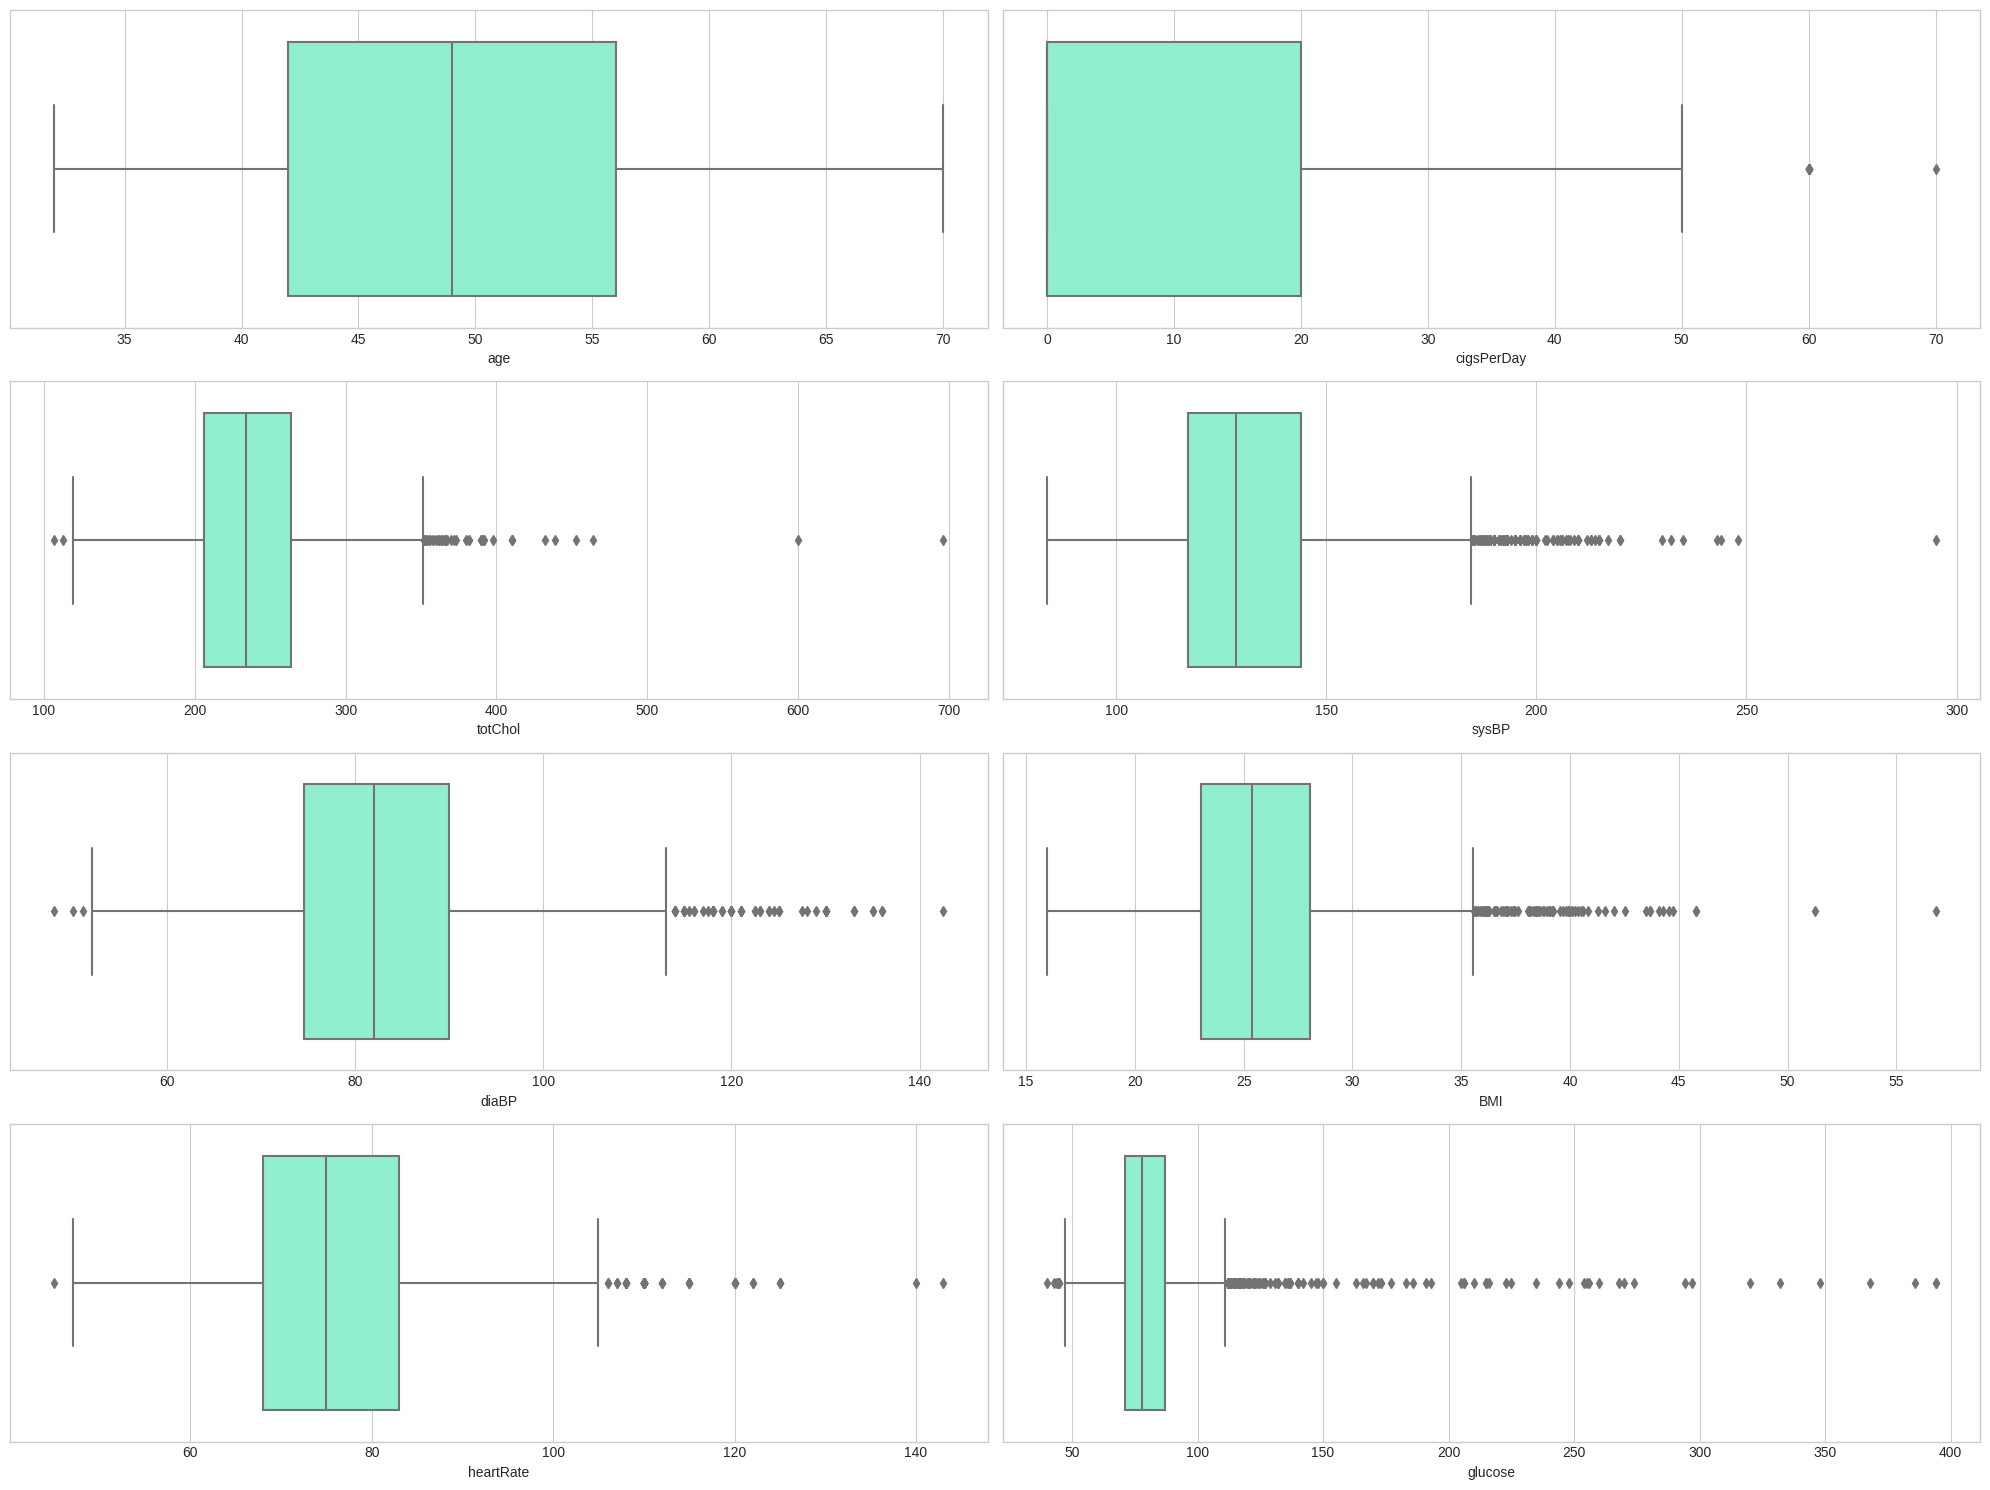

In [12]:
fig, axes = plt.subplots(4, 2, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_num.columns):
        sns.boxplot(x = df_num[columna],
            data = df, ax=axes[indice], 
            color = "aquamarine"); 
plt.tight_layout()
plt.show();

<Axes: >

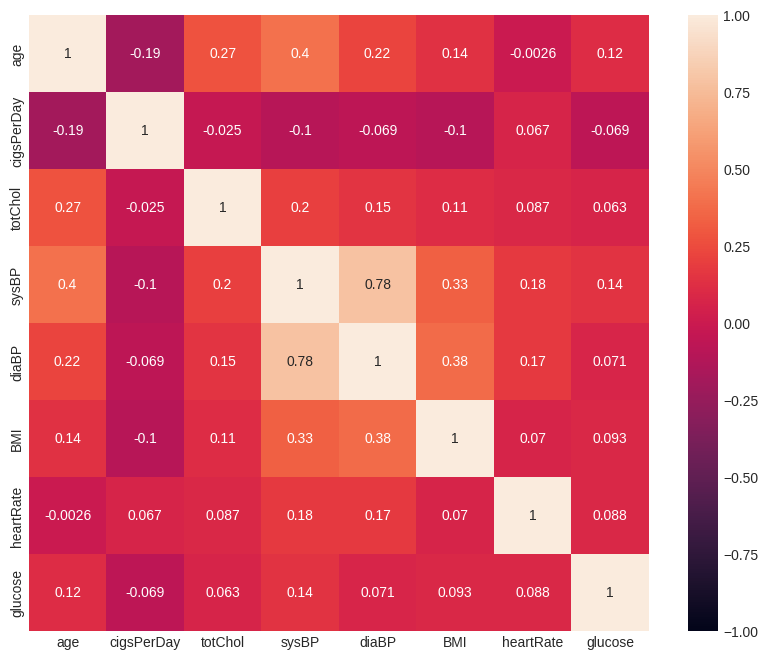

In [13]:
sns.heatmap(df_num.corr(),
            annot = True,
            vmin = -1,
            vmax = 1)

In [15]:
predictoras = df_cat.columns.drop('TenYearCHD')
combinaciones = list(combinations(predictoras, 2))

In [16]:
#Realizamos un crosstab para ver la relación entre las variables categóricas

for col in df_cat.columns:
    crosstab= rp.crosstab(df_cat[col], df_cat['TenYearCHD'], prop = 'row')
        
    display(crosstab)

TenYearCHD              
TenYearCHD          0      1    All
education                          
1.0             81.60  18.40  100.0
2.0             88.08  11.92  100.0
3.0             87.25  12.75  100.0
4.0             85.52  14.48  100.0
All             84.92  15.08  100.0

TenYearCHD              
TenYearCHD          0      1    All
sex                                
F               87.57  12.43  100.0
M               81.46  18.54  100.0
All             84.93  15.07  100.0

TenYearCHD              
TenYearCHD          0      1    All
is_smoking                         
NO              86.14  13.86  100.0
YES             83.70  16.30  100.0
All             84.93  15.07  100.0

TenYearCHD              
TenYearCHD          0      1    All
BPMeds                             
0.0             85.49  14.51  100.0
1.0             67.00  33.00  100.0
All             84.94  15.06  100.0

TenYearCHD              
TenYearCHD               0      1    All
prevalentStroke                         
0                    85.12  14.88  100.0
1                    54.55  45.45  100.0
All                  84.93  15.07  100.0

TenYearCHD              
TenYearCHD            0      1    All
prevalentHyp                         
0                 88.97  11.03  100.0
1                 76.15  23.85  100.0
All               84.93  15.07  100.0

TenYearCHD              
TenYearCHD          0      1    All
diabetes                           
0               85.53  14.47  100.0
1               62.07  37.93  100.0
All             84.93  15.07  100.0

TenYearCHD               
TenYearCHD          0       1    All
TenYearCHD                          
0              100.00    0.00  100.0
1                0.00  100.00  100.0
All             84.93   15.07  100.0

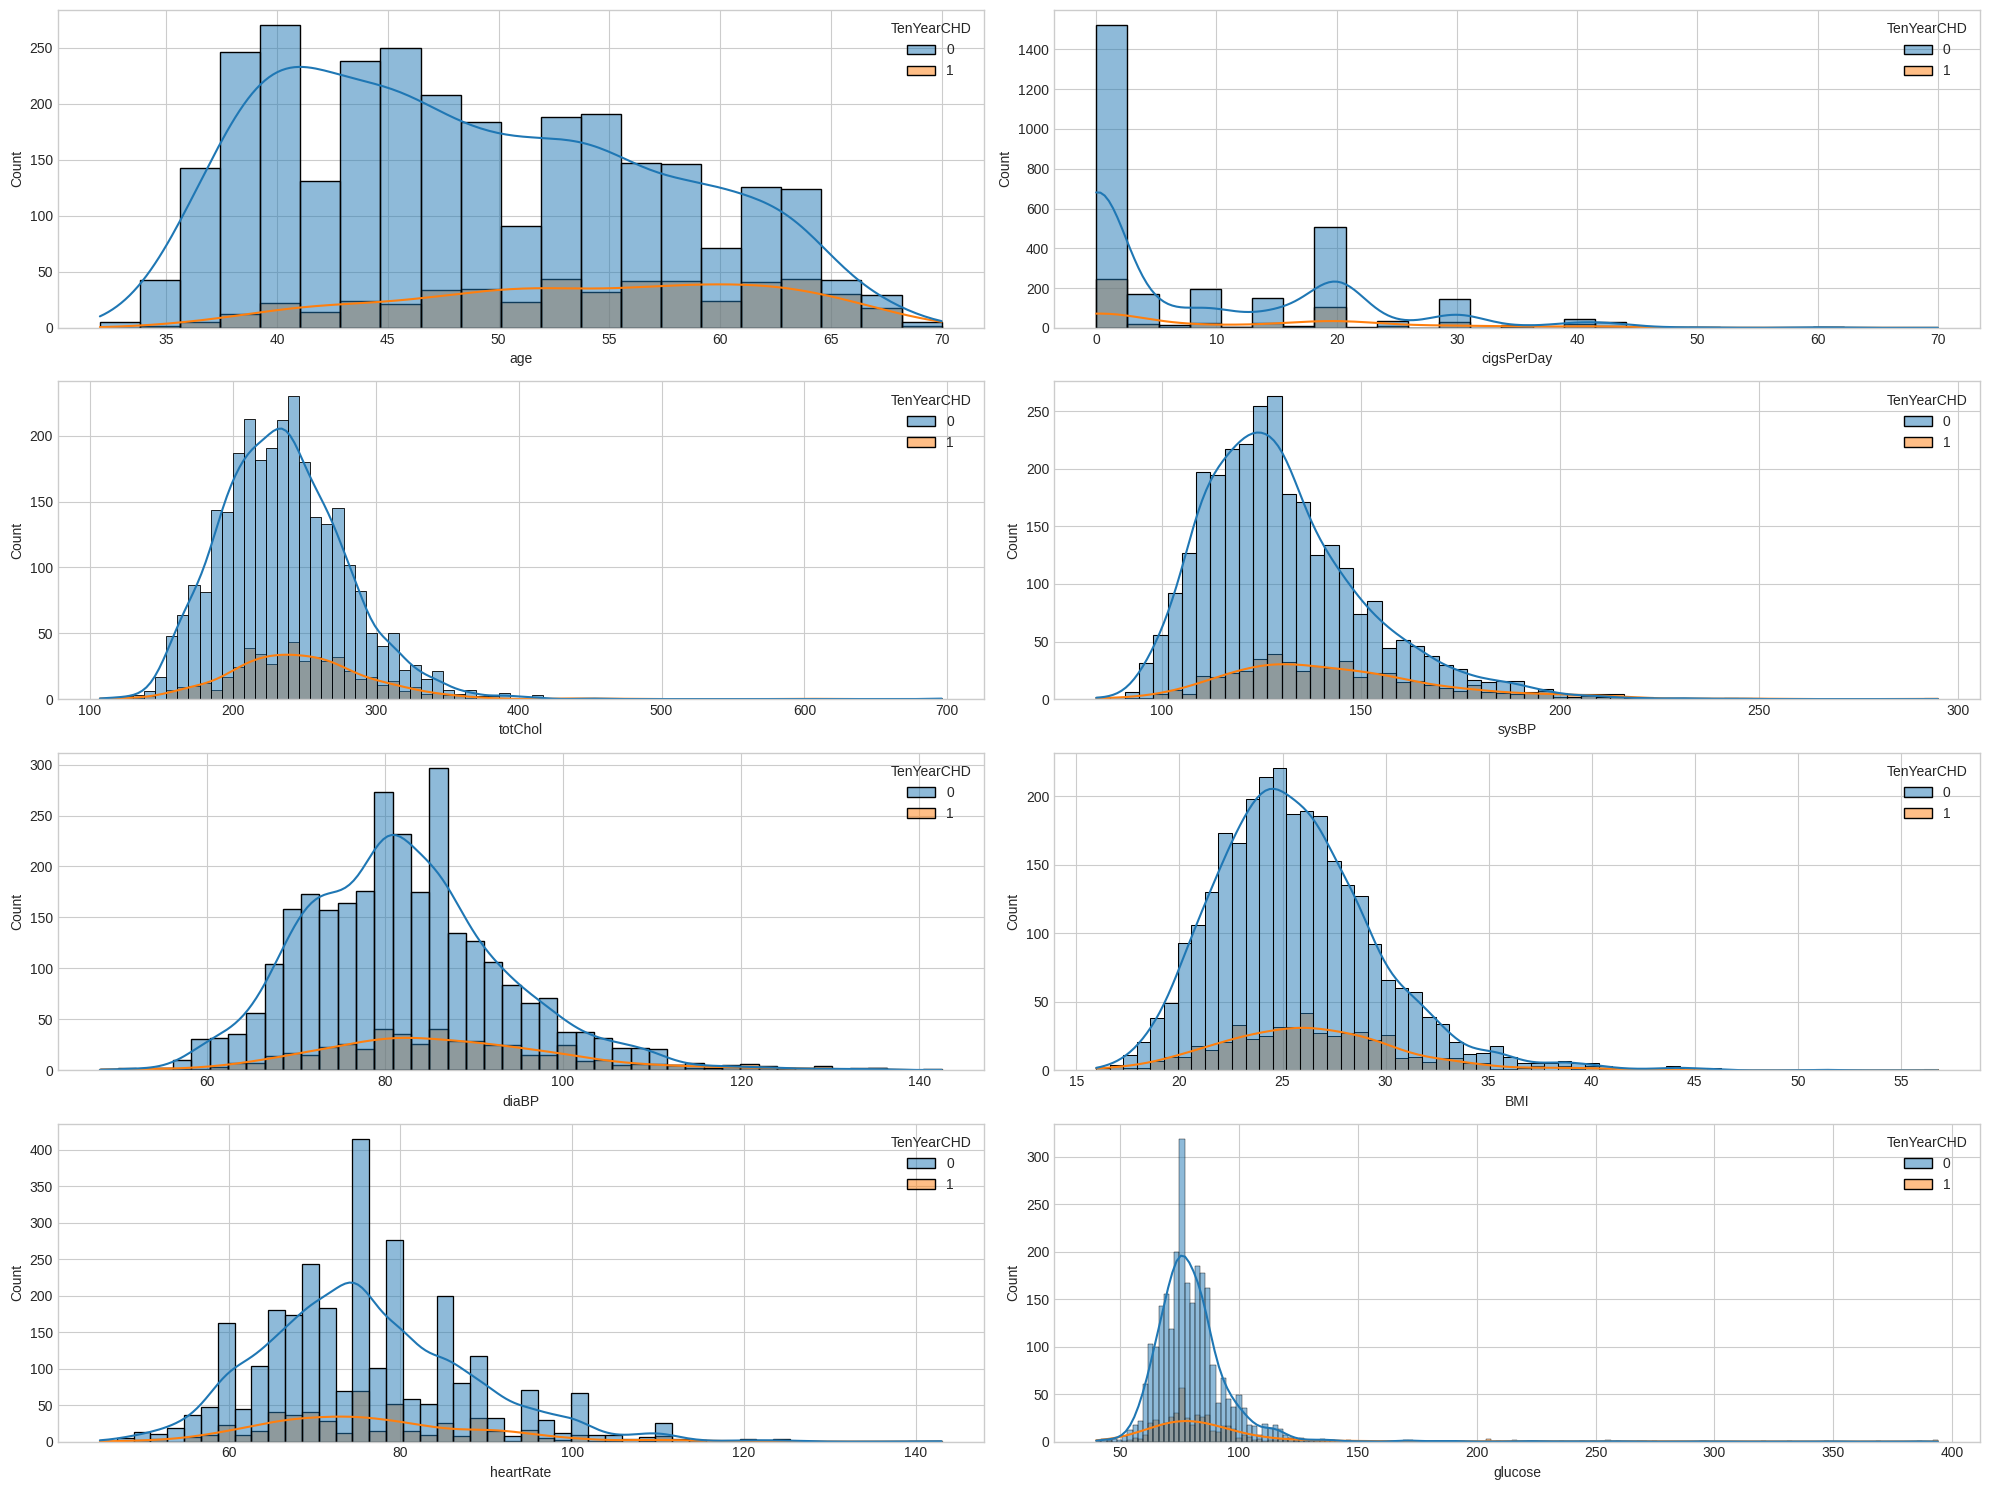

In [17]:
fig, axes = plt.subplots(4, 2, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_num.columns):
        sns.histplot(x = df_num[columna],
            hue = 'TenYearCHD',
            data = df,
            ax=axes[indice], 
            kde = True)
plt.tight_layout()
plt.show();

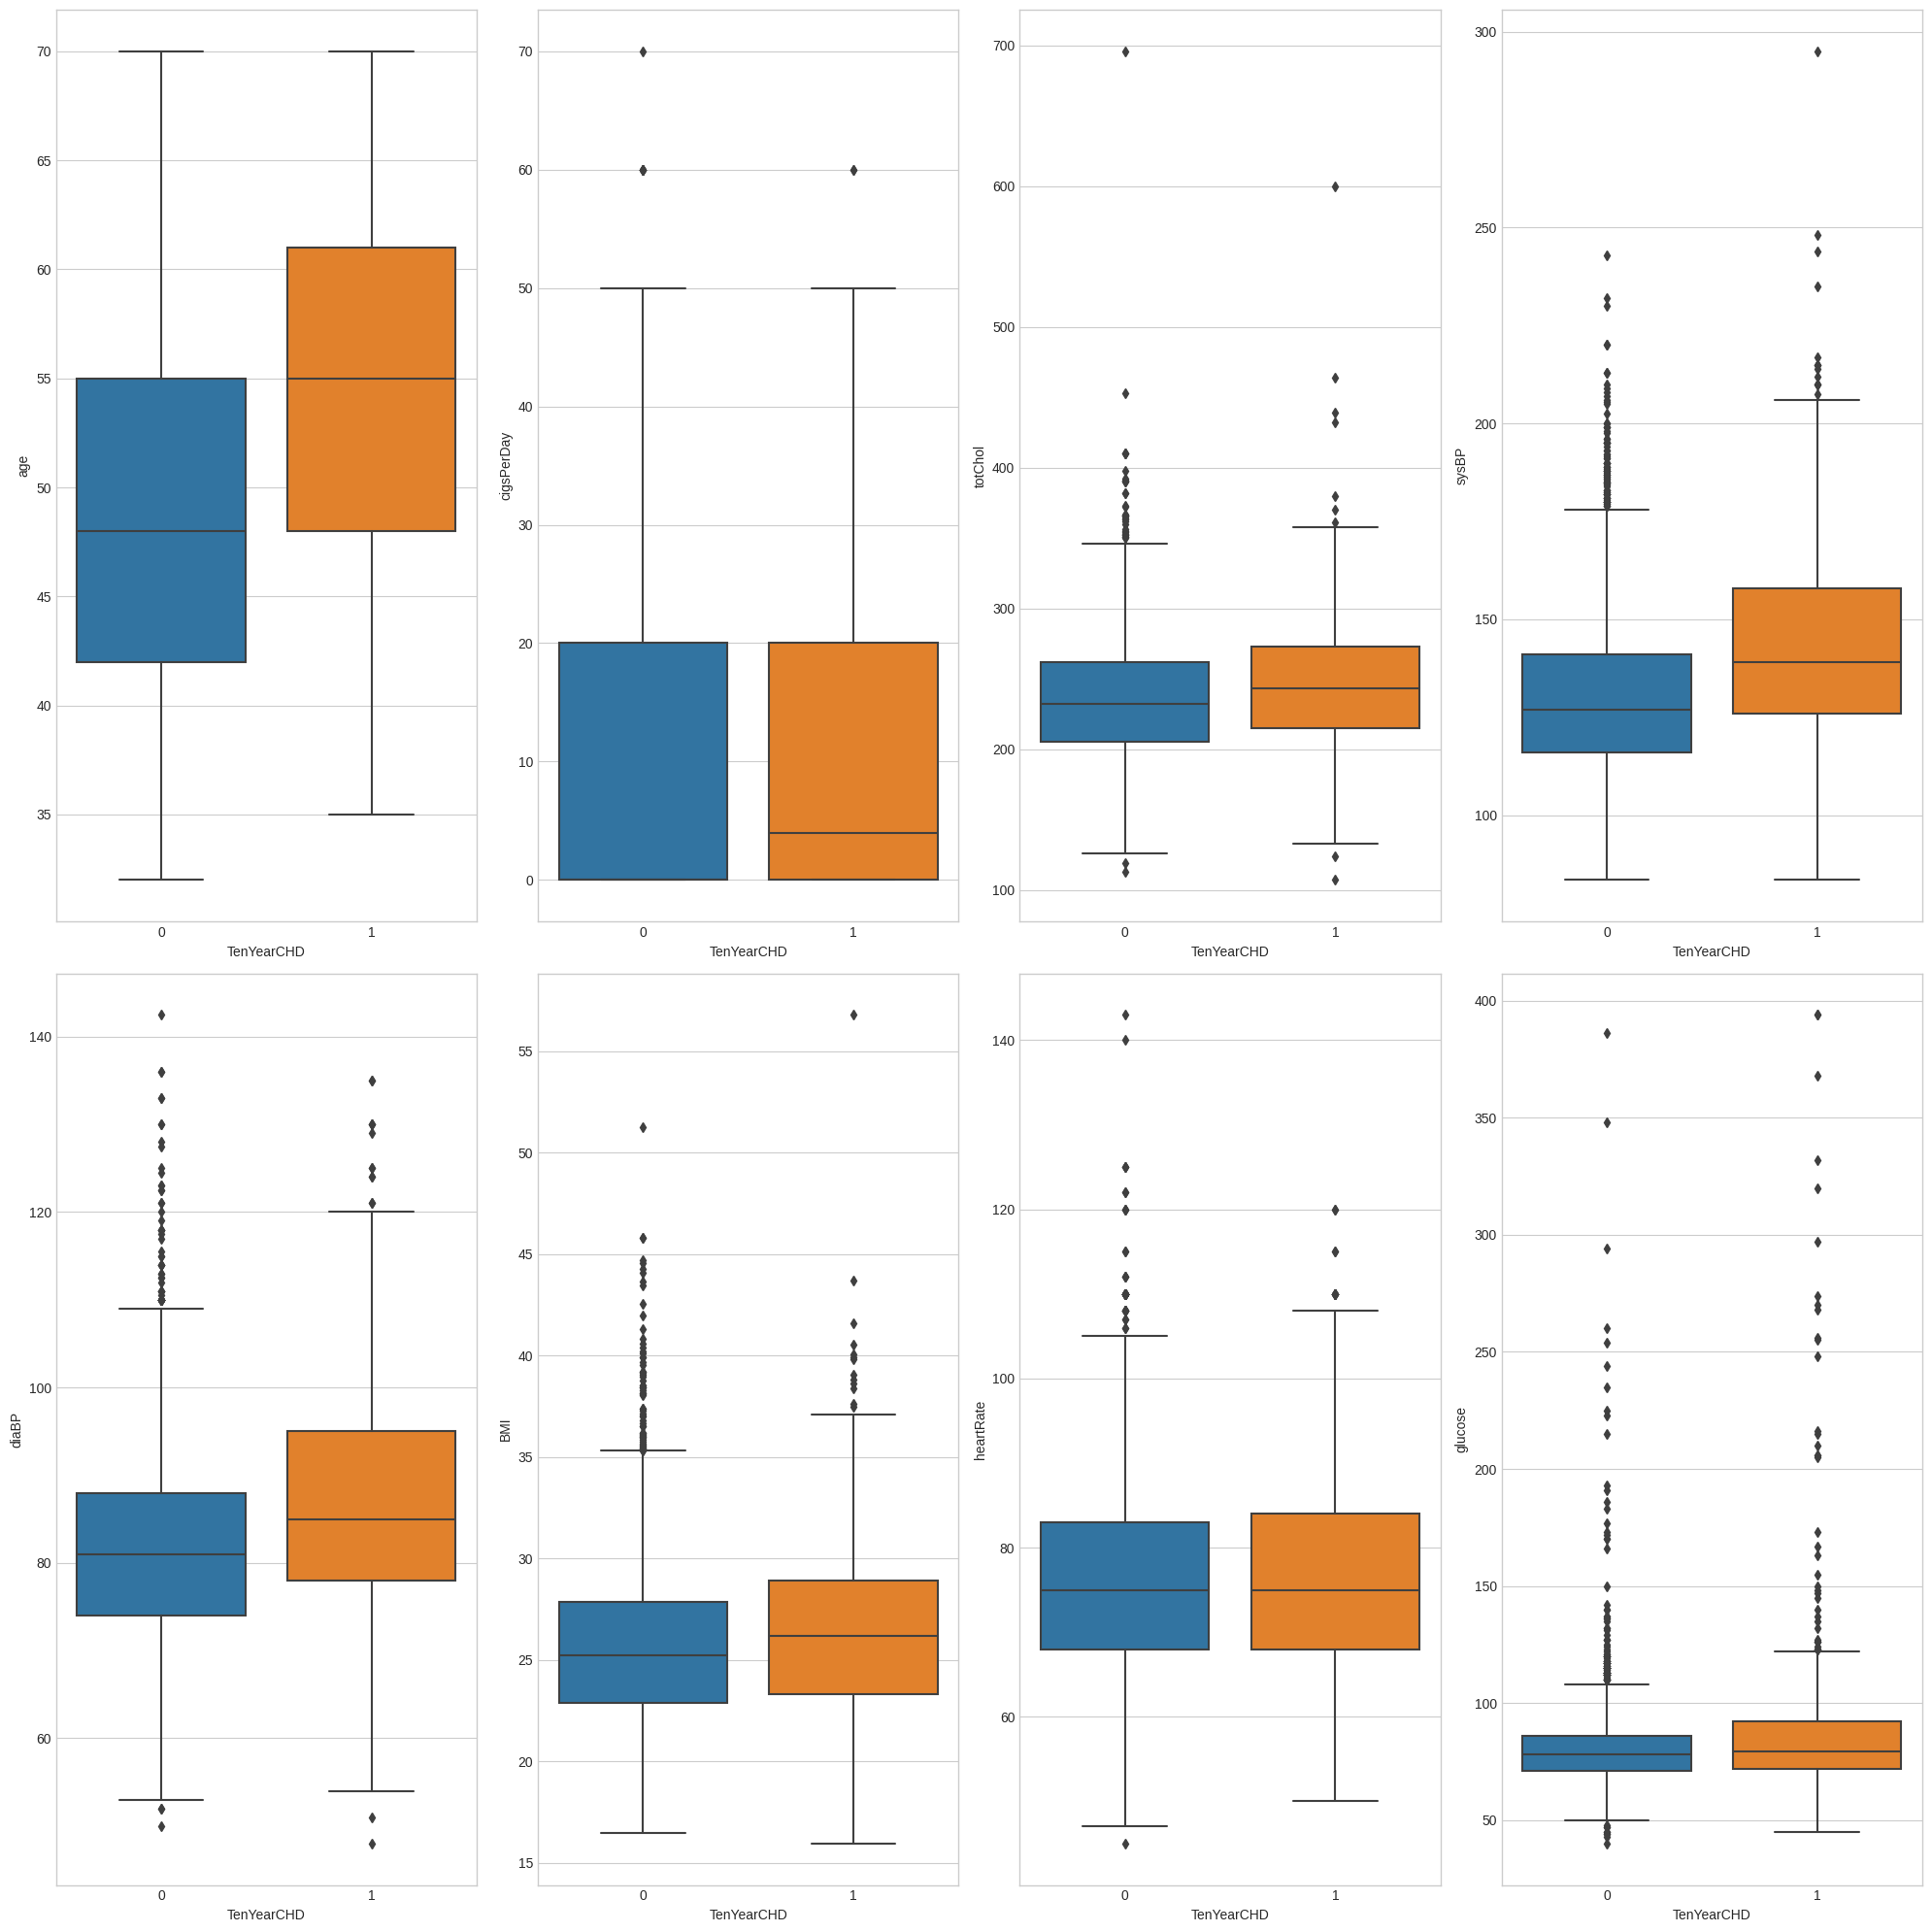

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(20,20))
axes = axes.flat

for indice, columna in enumerate(df_num.columns):
        sns.boxplot(y = df_num[columna],
            x = 'TenYearCHD',
            data = df,
            ax=axes[indice])
        
plt.tight_layout()
plt.show();